In [1]:
import glob
import os
import pathlib

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
    experimental,
)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Define image dimensions
img_height = 180
img_width = 180
batch_size = 32

# Define train and test directories
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Use ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 9376 images belonging to 8 classes.
Found 2344 images belonging to 8 classes.


In [3]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [6]:
len(base_model.layers)

238

In [7]:

# Load pre-trained EfficientNetB0 model

# # Freeze the base model layers
# base_model.trainable = False

# Unfreeze layers from a specific index onwards
# Here, we unfreeze starting from the 100th layer
for layer in base_model.layers[200:]:
    layer.trainable = True

# Add custom classification layers on top of EfficientNetB0
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
epochs=10
# Fine-tune the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Epoch 1/10
293/293 [==============================] - 48s 137ms/step - loss: 0.8635 - accuracy: 0.7082 - val_loss: 1.3786 - val_accuracy: 0.6601
Epoch 2/10
293/293 [==============================] - 39s 133ms/step - loss: 0.6889 - accuracy: 0.7635 - val_loss: 2.9026 - val_accuracy: 0.6597
Epoch 3/10
293/293 [==============================] - 40s 135ms/step - loss: 0.6184 - accuracy: 0.7882 - val_loss: 1.4778 - val_accuracy: 0.6601
Epoch 4/10
293/293 [==============================] - 38s 130ms/step - loss: 0.5742 - accuracy: 0.7937 - val_loss: 1.9051 - val_accuracy: 0.6597
Epoch 5/10
293/293 [==============================] - 38s 130ms/step - loss: 0.5289 - accuracy: 0.8139 - val_loss: 2.3059 - val_accuracy: 0.3253
Epoch 6/10
293/293 [==============================] - 38s 129ms/step - loss: 0.5121 - accuracy: 0.8178 - val_loss: 374.3952 - val_accuracy: 0.1147
Epoch 7/10
293/293 [==============================] - 38s 131ms/step - loss: 0.4707 - accuracy: 0.8335 - val_loss: 2.4200 - val_

In [9]:
epochs=10

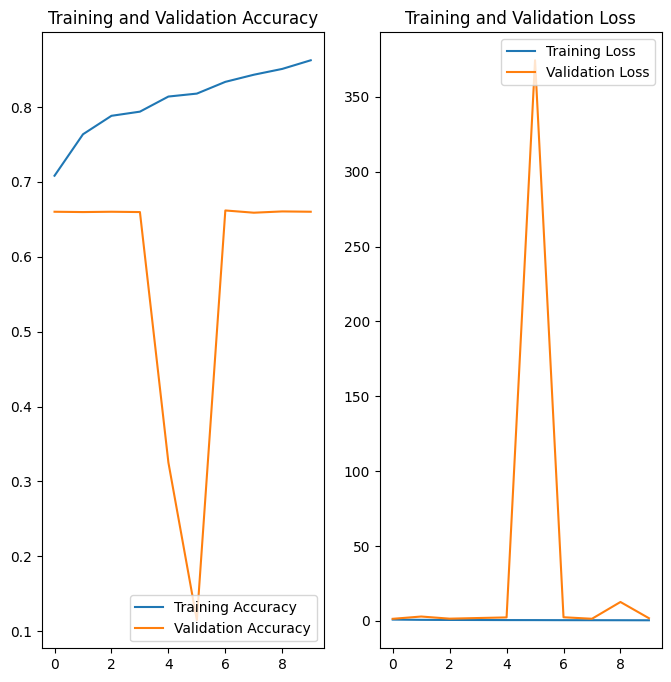

In [10]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [11]:
# Get final validation accuracy from the history object
final_val_accuracy = history.history['val_accuracy'][-1]
print("Final Validation Accuracy:", final_val_accuracy)

Final Validation Accuracy: 0.6601027250289917


In [16]:
tf.saved_model.save(model, "EfficientNetB0_SavedModel")


INFO:tensorflow:Assets written to: EfficientNetB0_SavedModel\assets


INFO:tensorflow:Assets written to: EfficientNetB0_SavedModel\assets


In [17]:
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Unfreeze layers from a specific index onwards
# Here, we unfreeze starting from the 140th layer
for layer in base_model.layers[140:]:
    layer.trainable = True

# Add custom classification layers on top of ResNet50
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Get final accuracy from the history object
final_accuracy = history.history['accuracy'][-1]
print("Final Accuracy:", final_accuracy)

# Get final validation accuracy from the history object
final_val_accuracy = history.history['val_accuracy'][-1]
print("Final Validation Accuracy:", final_val_accuracy)


94765736/94765736 [==============================] - 9s 0us/step
Epoch 1/10
293/293 [==============================] - 56s 176ms/step - loss: 1.0518 - accuracy: 0.6666 - val_loss: 1.4537 - val_accuracy: 0.6601
Epoch 2/10
293/293 [==============================] - 51s 175ms/step - loss: 0.9561 - accuracy: 0.6827 - val_loss: 1.5656 - val_accuracy: 0.6592
Epoch 3/10
293/293 [==============================] - 53s 179ms/step - loss: 0.8556 - accuracy: 0.6994 - val_loss: 1.3768 - val_accuracy: 0.6597
Epoch 4/10
293/293 [==============================] - 50s 170ms/step - loss: 0.8321 - accuracy: 0.7137 - val_loss: 1.0112 - val_accuracy: 0.6554
Epoch 5/10
293/293 [==============================] - 50s 169ms/step - loss: 0.7895 - accuracy: 0.7237 - val_loss: 0.8354 - val_accuracy: 0.6978
Epoch 6/10
293/293 [==============================] - 50s 172ms/step - loss: 0.7583 - accuracy: 0.7337 - val_loss: 1.1878 - val_accuracy: 0.6708
Epoch 7/10
293/293 [==============================] - 52s 176ms/s

In [18]:
len(train_generator.class_indices)

8

In [19]:
model.save("ResNet50_Model.h5")

# InceptionV3

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_height = 180
img_width = 180
batch_size = 32
num_classes = 8
# Load the InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Fine-tune: Unfreeze some of the top layers for adaptation
# fine_tune_at = 100
# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

for layer in base_model.layers:
    layer.trainable = True

# Add custom classification layers on top
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # Assuming num_classes is the number of classes in your dataset

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare the data with data augmentation
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


87910968/87910968 [==============================] - 8s 0us/step
Found 9376 images belonging to 8 classes.
Found 2344 images belonging to 8 classes.


In [21]:
# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/30
293/293 [==============================] - 42s 129ms/step - loss: 0.8898 - accuracy: 0.6971 - val_loss: 1.5209 - val_accuracy: 0.4730
Epoch 2/30
293/293 [==============================] - 38s 131ms/step - loss: 0.7693 - accuracy: 0.7270 - val_loss: 1.1075 - val_accuracy: 0.7175
Epoch 3/30
293/293 [==============================] - 39s 133ms/step - loss: 0.7203 - accuracy: 0.7474 - val_loss: 2.2954 - val_accuracy: 0.2038
Epoch 4/30
293/293 [==============================] - 39s 132ms/step - loss: 0.7010 - accuracy: 0.7495 - val_loss: 0.7861 - val_accuracy: 0.7376
Epoch 5/30
293/293 [==============================] - 39s 134ms/step - loss: 0.6615 - accuracy: 0.7641 - val_loss: 1.0317 - val_accuracy: 0.7153
Epoch 6/30
293/293 [==============================] - 40s 136ms/step - loss: 0.6478 - accuracy: 0.7660 - val_loss: 1.0416 - val_accuracy: 0.6824
Epoch 7/30
293/293 [==============================] - 40s 136ms/step - loss: 0.6213 - accuracy: 0.7787 - val_loss: 0.8735 - val_ac

In [22]:
model.save("InceptionV3.h5")

In [23]:
# Get final accuracy from the history object
final_accuracy = history.history['accuracy'][-1]
print("Final Accuracy:", final_accuracy)

# Get final validation accuracy from the history object
final_val_accuracy = history.history['val_accuracy'][-1]
print("Final Validation Accuracy:", final_val_accuracy)

Final Accuracy: 0.8714803457260132
Final Validation Accuracy: 0.7992294430732727
